## Funciones de activación
### Redes neuronales

In [1]:
import numpy as np
import math, random
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline  
from IPython.display import display, Math, Latex

#### Función Sigmoide
La razón principal por la que usamos la función sigmoide es porque existe entre (0 a 1). Por lo tanto, se usa especialmente para modelos en los que tenemos que predecir la probabilidad como un resultado. Dado que la probabilidad de cualquier cosa existe solo entre el rango de 0 y 1

In [2]:
#Creamos la función sigmoide con lambda , donde lambda[0] es la sigmoide y lambda[1] es su derivada
sigm = (lambda x:1/(1+np.e**(-x)),lambda x:np.exp(-x)/(np.exp(-x)+1)**2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

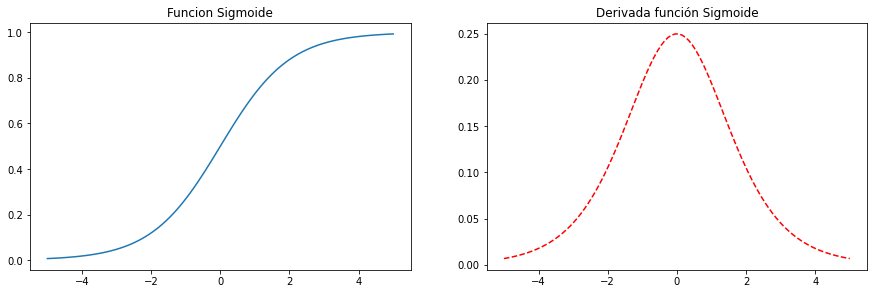

In [3]:
#Latex
display(Math(r'sigmoide(x) = \frac{1}{1+e^{-x}} '))
display(Math(r"$$sigmoide'(x) = \frac{e^{-x}}{(e^{-x}+1)^2}"))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,sigm[0](v))
plt.title("Funcion Sigmoide")
plt.subplot(222)
plt.plot(v,sigm[1](v), "--", color="red")
plt.title("Derivada función Sigmoide")
plt.show()

#### Función Tangente hiperbólica o Gaussiana
Es una función similar a la Sigmoide pero produce salidas en escala de [-1, +1]. Además, es una función continua. En otras palabras, la función produce resultados para cada valor de x.

In [4]:
#Tangente Hiperbólica y su derivada
cosh = (lambda x: (np.e**(x) + np.e**(-x))/2) #Saco la función de coseno hiperbólico para la derivada de la tangh
tanh = (lambda x: (np.e**(x) - np.e**(-x))/(np.e**(x) + np.e**(-x)), lambda x: 1/cosh(x)**2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

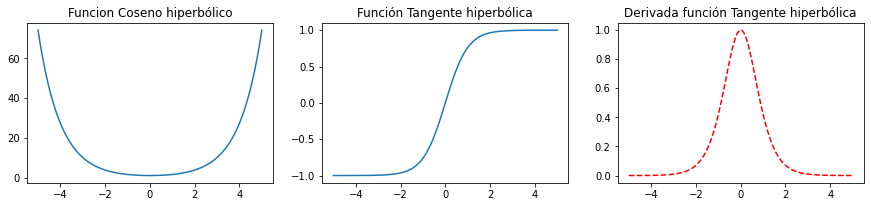

In [5]:
#Latex
display(Math(r'cosh(x) = \frac{e^{-x} + e^{-x}}{2}'))
display(Math(r'tanh(x) = \frac{e^{-x} - e^{-x}}{e^{-x} + e^{-x}} '))
display(Math(r"'tanh(x) = \frac{1}{\cosh^2{x}} "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(331)
plt.plot(v,cosh(v))
plt.title("Funcion Coseno hiperbólico")
plt.subplot(332)
plt.plot(v,tanh[0](v))
plt.title("Función Tangente hiperbólica")
plt.subplot(333)
plt.plot(v,tanh[1](v), "--", color="red")
plt.title("Derivada función Tangente hiperbólica")
plt.savefig('images\sigmoide.png')
plt.show()

#### Función RELU (Rectified Lineal Unit)
ReLU es la función de activación más utilizada en el mundo en este momento. Desde entonces, se utiliza en casi todas las redes neuronales convolucionales o el aprendizaje profundo.
Como puedes ver, ReLU está medio rectificado (desde abajo). f(z) es cero cuando z es menor que cero y f(z) es igual a z cuando z es superior o igual a cero.
Es una función usada en las capas ocultas de nuestra red neuronal, NO en las de salida

In [6]:
#Relu Rectified Lineal Unit
relu = (lambda x: np.maximum(0,x), lambda x: 1. * (x > 0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

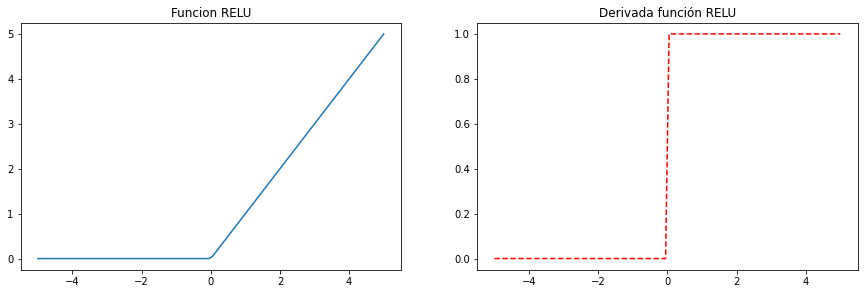

In [7]:
#Latex
display(Math(r'relu(x) = \max(0,x) '))
display(Math(r"'relu(x) = 1.(x>0) "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,relu[0](v))
plt.title("Funcion RELU")
plt.subplot(222)
plt.plot(v,relu[1](v), "--", color="red")
plt.title("Derivada función RELU")
plt.savefig('images\sigmoide.png')
plt.show()

### Función ELU (Exponential Linear Unit)
La Unidad Lineal Exponencial (ELU) es una función de activación para redes neuronales. A diferencia de las ReLU, las ELU tienen valores negativos, lo que les permite acercar las activaciones de unidades medias a cero, como la normalización por lotes, pero con una menor complejidad computacional. Los cambios medios hacia cero aceleran el aprendizaje al acercar el gradiente normal al gradiente natural de la unidad debido a un efecto de cambio de sesgo reducido. Si bien las LReLU y las PReLU también tienen valores negativos, no garantizan un estado de desactivación resistente al ruido. Las ELU se saturan a un valor negativo con entradas más pequeñas y, por lo tanto, disminuyen la variación y la información propagadas hacia adelante.

$
\begin{equation}
     ELU(x) = \left\{
	       \begin{array}{ll}
		 x      & \mathrm{si\ } x > 0 \\
		 \alpha(e^x -1) & \mathrm{si\ } x\le 0 \\
	       \end{array}
	     \right.
   \end{equation}
$

$
\begin{equation}
     ELU'(x) = \left\{
	       \begin{array}{ll}
		 1      & \mathrm{si\ } x > 0 \\
		 \alpha e^x & \mathrm{si\ } x < 0 \\
	       \end{array}
	     \right.
   \end{equation}
$

Donde $ \alpha > 0 $

Ref: https://arxiv.org/pdf/1511.07289v5.pdf

In [67]:
elu= (lambda x, alpha: alpha*(np.exp(x)-1) if (x <= 0) else x, lambda x,alpha: alpha*np.exp(x) if (x<0) else 1)

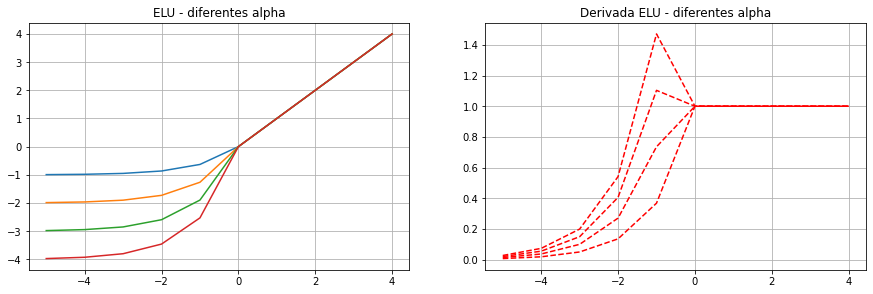

In [75]:
plt.figure(1,figsize=(15,10))
for u in range(1, 5):
    inputs = [x for x in range(-5, 5)]
    outputs = [elu[0](x, u) for x in inputs]
    output_prime = [elu[1](x, u) for x in inputs]
    plt.subplot(221)
    plt.grid(visible=True)
    plt.title("ELU - diferentes alpha")
    plt.plot(inputs, outputs)
    plt.subplot(222)
    plt.grid(visible=True)
    plt.title("Derivada ELU - diferentes alpha")
    plt.plot(inputs, output_prime, "--", color="red")

plt.show()

### Función Swish
Swish es una función suave y no monótona que iguala o supera constantemente a ReLU en redes profundas aplicadas a una variedad de dominios desafiantes, como la clasificación de imágenes y la traducción automática. Es ilimitado arriba y acotado abajo y es el atributo no monótono el que realmente crea la diferencia.

$f(x)=x(\frac{1}{1+e^{-x}})$

#### Derivada
 
$f'(x) = f(x) + \omega(x)(1 − f (x))$

$\omega(x) = sigmoide(x) = \frac{1}{1 + e^{−x}}$

Ref: https://arxiv.org/pdf/1710.05941v1.pdf?source=post_page

In [10]:
swish=(lambda x: x*sigm[0](x))
swish_derivative=(lambda x: swish(x)+sigm[0](x)*(1-swish(x)))

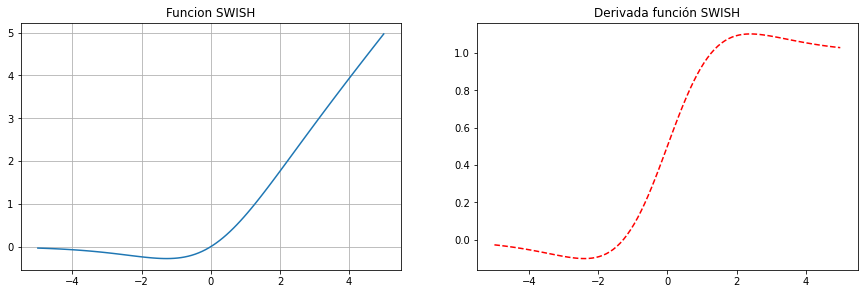

In [11]:
v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.grid(visible=True)
plt.plot(v,swish(v))
plt.title("Funcion SWISH")
plt.subplot(222)
plt.plot(v,swish_derivative(v), "--", color="red")
plt.title("Derivada función SWISH")
plt.show()

### Función MISH
Mish, una nueva función de activación no monotónica autorregulada inspirada en la propiedad de activación automática de Swish. Mish se define matemáticamente como:

$f(x) = x tanh(softplus(x)) = x tanh(ln(1+e^x))$ 

Mish tiende a igualar o mejorar el rendimiento de las arquitecturas de redes neuronales en comparación con Swish, ReLU y Leaky ReLU a través de diferentes tareas en Computer Vision.

ReF: https://arxiv.org/pdf/1908.08681.pdf

In [12]:
#MISH
mish = (lambda x: x*tanh[0](np.log(1+np.e**x)))

#### Derivada de la función Mish
$f'(x)=\frac{e^x\omega}{\alpha²}$
<br>
$\omega=4(x + 1) + 4e^{2x} + e^{3x} + e^x(4x + 6)$
<br>
$\alpha=2e^x + e^{2x} + 2$

In [13]:
def mish_derivative(x):
    omega = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
    delta = 1 + pow((np.exp(x) + 1), 2)
    derivative = np.exp(x) * omega / pow(delta, 2)
    return derivative

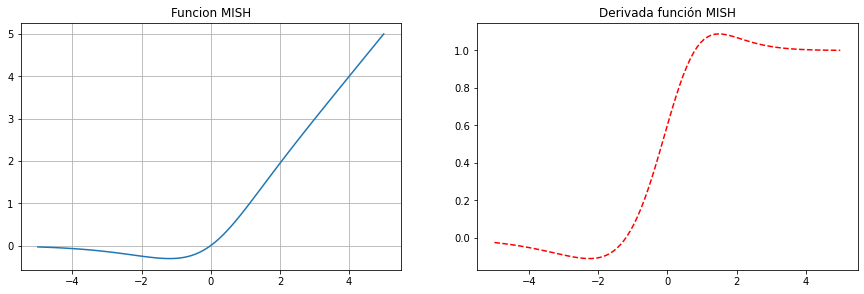

In [15]:
v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.grid(visible=True)
plt.plot(v,mish(v))
plt.title("Funcion MISH")
plt.subplot(222)
plt.plot(v,mish_derivative(v), "--", color="red")
plt.title("Derivada función MISH")
plt.show()